In [42]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

genes = ['gene' + str(i) for i in range(1,101)]

wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]

data = pd.DataFrame(columns = [*wt,*ko], index = genes)

for gene in data.index:
    data.loc[gene, 'wt1': 'wt5'] = np.random.poisson(lam = rd.randrange(10,1000), size = 5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam = rd.randrange(10,1000), size = 5)
    
print(data)


         wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1    640  572  569  596  560  580  577  600  589  561
gene2    544  571  567  548  565  359  372  391  401  370
gene3    157  136  150  144  136  118  122  105  116  111
gene4    804  798  787  789  818  839  841  883  843  872
gene5    681  729  725  664  702  563  558  518  493  510
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
gene96   322  331  356  310  313   88   81   92   87   99
gene97   524  553  517  478  487  815  837  788  792  849
gene98   804  800  739  805  805   87   81   87   72   80
gene99   252  289  265  262  245  302  324  296  306  292
gene100  599  566  580  526  557  441  432  417  470  447

[100 rows x 10 columns]


In [44]:
scaled_data= preprocessing.scale(data.T) # Samples always need to be in the columns and feartures need to be in rows
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data) # We generate coordinates for the PCA graph based on the loading score and scaled data

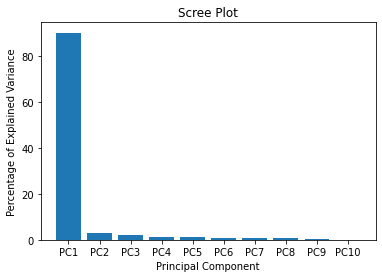

In [50]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
labels = ['PC' + str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


Text(0, 0.5, 'PC2 - 2.8%')

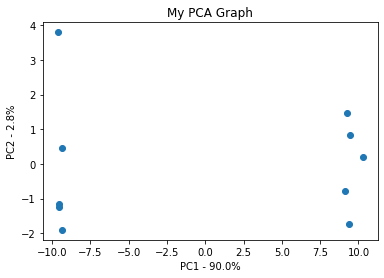

In [51]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

In [41]:
#########################
#
# Determine which genes had the biggest influence on PC1
#
#########################
 
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
## now sort the loading scores based on their magnitude
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
 
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values
 
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene26    -0.106105
gene77     0.106085
gene88     0.106056
gene8     -0.106052
gene94    -0.106041
gene48     0.106036
gene13    -0.106035
gene100   -0.106016
gene50     0.105991
gene46     0.105986
dtype: float64
